<a href="https://colab.research.google.com/github/FatemeZamanian/DeepLearning/blob/main/SCRFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install requirements

In [ ]:
!pip3 install torch==1.8.2 torchvision==0.9.2 torchaudio==0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

In [ ]:
!pip install "mmcv-full>=1.1.5, <1.4." -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.8.0/index.html

In [ ]:
!pip install onnx
!pip install onnxsim
!pip install onnxruntime

### Download course codes and files

In [ ]:
!git clone https://github.com/deepinsight/insightface.git

In [ ]:
%cd insightface/detection/scrfd
!ls

In [ ]:
# for install mmdet
!pip install -v -e .

In [ ]:
# download sample image
!mkdir -p tests/data
!wget -O tests/data/t3.jpg https://avatars.githubusercontent.com/u/78360814?v=4

In [ ]:
# download pre-trained weights
!wget -O model.pth https://fbp5ia.dm.files.1drv.com/y4mYv4TuQ3MwH5g6rwLqWvAbeKVKd9423VgBSv_z5eaJBLbt3W1jEN0gPphNR4aFKEdw6ijyb8wAMtuRftCju9oS4dCWvqmPc0fTUvAFwTszYvlnTUD4ms8AYHH2v-gQThsF6wIR5UMwoH-ul9-jYdT9EpMiOazNq08JiT4PUxp_Hy9NMt1iArAf3f7vG0xkdsoDJ5nc3p15AzAwyEtAjimmg

### Export model

In the `tools/scrfd2onnx.py` file, in line 10, change
```
from mmdet.core
```
to
```
from mmdet.core.export
```

In [ ]:
# export pytorch model to onnx model
!python tools/scrfd2onnx.py configs/scrfd/scrfd_10g_bnkps.py model.pth --input-img tests/data/t3.jpg --output-file det.onnx

### Inference

In [16]:
!mkdir outputs

mkdir: cannot create directory ‘outputs’: File exists


In [ ]:
# run inference
!python tools/scrfd.py

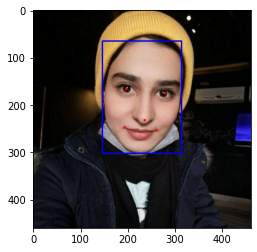

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("outputs/t3.jpg")
plt.imshow(image)